Verimizi alalım önce

In [42]:
import pandas as pd
data = pd.read_csv("train.tsv",sep = "\t")

In [43]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


Verinin bilgilerine bakalım

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    10299 non-null  int64 
 1   SentenceId  10299 non-null  int64 
 2   Phrase      10299 non-null  object
 3   Sentiment   10299 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 322.0+ KB


Önİşleme işlemlerini yapalım

In [45]:
#buyuk-kucuk donusumu
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [47]:
#noktalama işaretleri
data['Phrase'] = data['Phrase'].str.replace('[^\w\s]','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [48]:
#sayılar
data['Phrase'] = data['Phrase'].str.replace('\d','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [49]:
#stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
#seyreklerin silinmesi
sil = pd.Series(' '.join(data['Phrase']).split()).value_counts()[-100:]
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))

In [51]:
#lemmi
from textblob import Word
nltk.download('wordnet')
data['Phrase'] = data['Phrase'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
data['Phrase'].head()

0    series escapade demonstrating adage good goose...
1       series escapade demonstrating adage good goose
2                                               series
3                                                     
4                                               series
Name: Phrase, dtype: object

Boş yerleri silelim

In [64]:
nan_value = float("NaN")
data.replace("", nan_value, inplace=True)

In [65]:
data.dropna(inplace = True)

In [66]:
data['Phrase'].head()

0    series escapade demonstrating adage good goose...
1       series escapade demonstrating adage good goose
2                                               series
4                                               series
5              escapade demonstrating adage good goose
Name: Phrase, dtype: object

**Terim Frekansı** : 

In [67]:
tf1 = (data["Phrase"]).apply(lambda x: 
                             pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [68]:
tf1.columns = ["words","tf"]

In [69]:
tf1.head()

,words,tf
0,good,121.0
1,series,16.0
2,escapade,5.0
3,demonstrating,7.0
4,adage,8.0


In [70]:
tf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2289 entries, 0 to 2288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   words   2289 non-null   object 
 1   tf      2289 non-null   float64
dtypes: float64(1), object(1)
memory usage: 35.9+ KB


tf1 içinde bulunana her kelime uniqe yani benzersiz olduğunuda doğruladık

In [71]:
tf1.nunique()

words    2289
tf         94
dtype: int64

en çok kullanılan kelimelere bakalım

In [72]:
x = tf1[tf1['tf'] > 90]

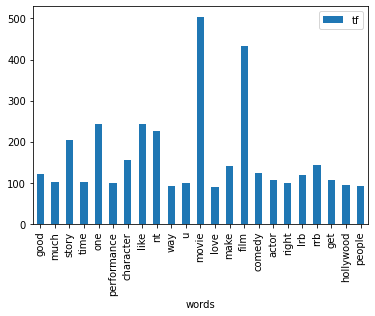

In [73]:
x.plot.bar(x = "words", y = "tf")

**Word Cloud**

Veri görselleştirme için bir tekniktir 

In [74]:
!pip install wordcloud 

In [75]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


In [76]:
text1 = data["Phrase"][0]
text1

'series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story'

In [77]:
wordcloud = WordCloud().generate(text1)

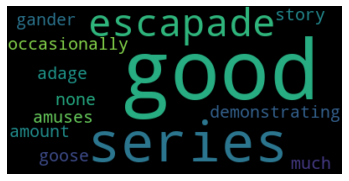

In [78]:
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

buna kelime bulutu denir = wordcloud

az daha şekil şukul yapalım

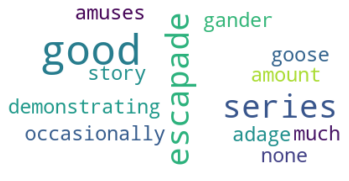

In [82]:
wordcloud = WordCloud(max_font_size = 50,
                      max_words= 100,
                      background_color= "white").generate(text1)

plt.figure()
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

fotoğraf olarak kaydetmek için

In [83]:
wordcloud.to_file("wordcloud.png");

Bütün metin için yapalım

In [84]:
text_all = " ".join(i for i in data.Phrase)

In [85]:
text_all

'series escapade demonstrating adage good goose also good gander occasionally amuses none amount much story series escapade demonstrating adage good goose series series escapade demonstrating adage good goose escapade demonstrating adage good goose escapade demonstrating adage good goose demonstrating adage demonstrating adage adage good goose good goose good goose good goose good goose goose goose also good gander occasionally amuses none amount much story also good gander occasionally amuses none amount much story also also good gander occasionally amuses none amount much story gander occasionally amuses none amount much story gander occasionally amuses none amount much story gander gander gander occasionally amuses none amount much story occasionally amuses none amount much story occasionally amuses none amount much story amuses none amount much story none amount much story none amount much story amount much story amount much story amount much story much story much story story story

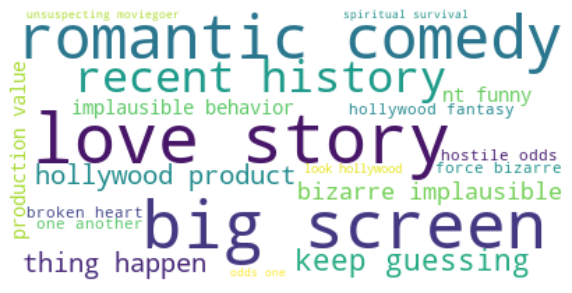

In [88]:
wordcloud = WordCloud(max_font_size = 50,
                      max_words= 20,
                      background_color= "white").generate(text_all)

plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

**Şablonlara göre WordCloud**

Bir resmin içinede kelimeleri yazdırabiliriz bunu uzun uzadıya yapmaya gerek yok. 